# OPO symmetry MFT

## Initial Environment

In [1]:
#import all the things we need
%matplotlib inline
from qutip import*

from scipy import *

import QCLSolver.data as Data
import QCLSolver.solver as Solver

import numpy as np

import matplotlib.pyplot as plt

import time

In [2]:
#helper function
def BuildOperator_Exact(Ea:float,Eb:float,g:float):
    Na=10; Nc=10;Nb=10
    psi0=tensor(basis(Na,psi0_l[0]),basis(Nb,psi0_l[1]),basis(Nc,psi0_l[2]))
    a=tensor(destroy(Na),qeye(Nb),qeye(Nc))
    b=tensor(qeye(Na),destroy(Nb),qeye(Nc))
    c=tensor(qeye(Na),qeye(Nb),destroy(Nc))
    H=g*(a.dag()*b*c.dag()+a*b.dag()*c)+Ea*(a.dag()+a)+Eb*(b.dag()+b)
    c_ops=[]
    c_ops.append(np.sqrt(kappa_a)*a)
    c_ops.append(np.sqrt(kappa_b)*b)
    c_ops.append(np.sqrt(kappa_c)*c)
    operator={'Hamilton':H,'Collapse':c_ops,'Initial_state':psi0,'track':[b,c,a]}
    return operator

## Various Parameters $E_b$ Constant g

In [13]:
##parameters
kappa_a=2
kappa_b=2
psi0_l=[0,0]
Eb=np.linspace(0.1,12,40); g=0.2
tlist=np.linspace(0,20,2000)

Approximate

In [14]:
data_csh=Data.Data([['bAA',g],['Baa',g],['b',1],['B',1]],[['a',kappa_a],['b',kappa_b]],['b','Aa'], 2)
sol_csh=np.zeros([np.size(Eb),2],dtype=complex)

Complete

In [15]:
data_com=Data.Data([['bAA',g],['Baa',g],['b',1],['B',1]],[['a',kappa_a],['b',kappa_b]],['Bb','Aa'], 4)
sol_com=np.zeros([np.size(Eb),2],dtype=complex)

In [16]:
ts=time.time()
for j in range(0,np.size(Eb)):
        data_csh.SetCoefHOList([g,g,Eb[j],Eb[j]])
        data_com.SetCoefHOList([g,g,Eb[j],Eb[j]])
        output_csh=Solver.Solve(data_csh,[0,0],(0,tlist[-1]),t_eval=tlist,rtol=1e-10,atol=1e-12)
        output_com=Solver.Solve(data_com,psi0_l,(0,tlist[-1]),t_eval=tlist,rtol=1e-10,atol=1e-12)
        sol_csh[j][0]=output_csh.y[0][-1]*np.conj(output_csh.y[0][-1])
        sol_csh[j][1]=output_csh.y[1][-1]
        sol_com[j][0]=output_com.y[0][-1]
        sol_com[j][1]=output_com.y[1][-1]
te=time.time()
print('Time cost:'+str(te-ts)+'s')

Time cost:174.81762313842773s


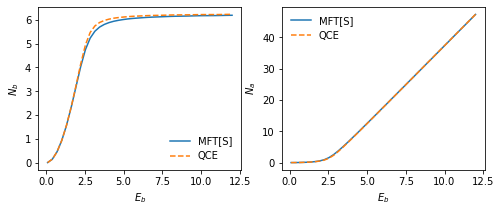

In [18]:
fig, axes = plt.subplots(1,2, figsize=(8,3))

#axes[2].set_ylim(0,0.05);#axes[1].set_xlim(Ea[0]*Ea[0],Ea[-1]*Ea[-1])
axes[0].set_xlabel(r'$E_b$');axes[1].set_xlabel(r'$E_b$');
axes[0].plot(Eb,np.real(sol_csh[...,0]),linestyle='-',label='MFT[S]')
axes[1].plot(Eb,np.real(sol_csh[...,1]),linestyle='-',label='MFT[S]')
axes[0].plot(Eb,np.real(sol_com[...,0]),linestyle='--',label='QCE')
axes[1].plot(Eb,np.real(sol_com[...,1]),linestyle='--',label='QCE')

#axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


axes[0].legend(loc=0,frameon=False)
axes[1].legend(loc=0,frameon=False) 


axes[0].set_ylabel(r'$N_b$')
axes[1].set_ylabel(r'$N_a$')  

fig.savefig('imgsP/OPO_g_'+str(g)+'_Eb_'+str(Eb[0])+'-'+str(Eb[-1])+'.svg',dpi=600,format='svg',bbox_inches='tight')
fig.savefig('imgsP/OPO_g_'+str(g)+'_Eb_'+str(Eb[0])+'-'+str(Eb[-1])+'.pdf',dpi=600,format='pdf',bbox_inches='tight')